In [1]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

import sys
sys.path.append('../../')
from src.skmatter.decomposition.pcovc_new import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0

In [2]:
bcancer = datasets.load_breast_cancer()
print(bcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
X, y = bcancer.data, bcancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
from sklearn.linear_model import LogisticRegression


model_ss = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="sample")
model_fs = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="feature")
np.set_printoptions(threshold=sys.maxsize)

model_ss.fit(X_scaled, y)
model_fs.fit(X_scaled, y)

X_ss = model_ss.transform(X_scaled)
X_fs = model_fs.transform(X_scaled)

r_ss = model_ss.inverse_transform(X_ss)
r_fs = model_fs.inverse_transform(X_fs)

# print(r_ss)
# print(r_fs)
m = r_ss-r_fs
m


array([[-5.20201889e-04, -2.87209559e-04, -5.15418901e-04,
        -5.23919344e-04, -1.05674750e-04, -2.07421378e-04,
        -3.19801003e-04, -4.23770678e-04, -6.36633410e-05,
         2.33816441e-04, -3.97677280e-04,  5.49958356e-05,
        -3.80173671e-04, -4.39390138e-04,  1.55561170e-04,
         4.56496585e-05,  2.45339336e-05, -8.23464771e-05,
         1.36586341e-04,  1.89704876e-04, -5.51675812e-04,
        -3.13544968e-04, -5.42633130e-04, -5.49347822e-04,
        -1.66580446e-04, -2.07936694e-04, -2.74952872e-04,
        -4.14186365e-04, -1.45662659e-04,  1.05662493e-05],
       [-6.34480768e-04, -2.62889511e-04, -6.27788759e-04,
        -6.35798701e-04, -4.57444337e-05, -2.32056312e-04,
        -3.69671338e-04, -4.84883865e-04, -2.60169766e-05,
         3.06376459e-04, -4.70889321e-04,  7.20079531e-05,
        -4.59052210e-04, -5.19522986e-04,  2.04669762e-04,
        -5.25972459e-06, -2.09210942e-05, -1.48155141e-04,
         1.43779947e-04,  1.63851805e-04, -6.41373473e-

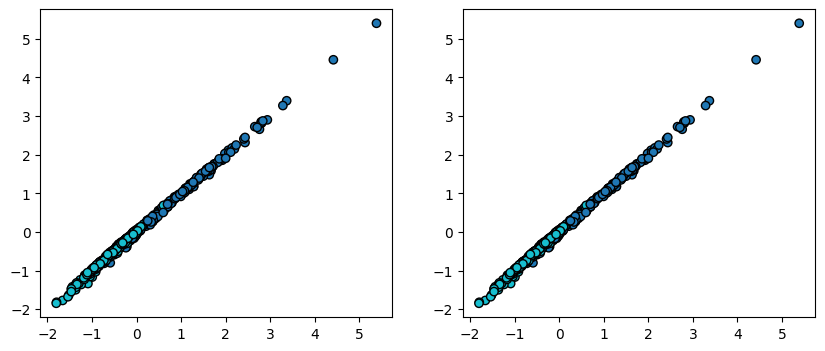

In [5]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(r_ss[:, 2], r_ss[:, 3], c=y)
axis2.scatter(r_fs[:, 2], r_fs[:, 3], c=y)

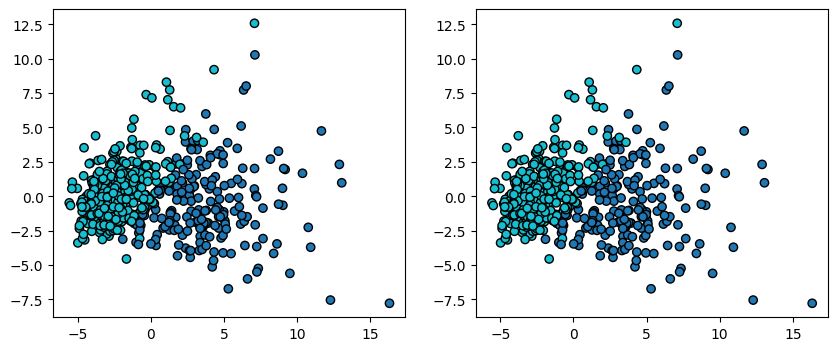

In [6]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(X_ss[:, 0], X_ss[:, 1], c=y)
axis2.scatter(X_fs[:, 0], X_fs[:, 1], c=y)